<a href="https://colab.research.google.com/github/poojasanthoshenpothele/codesoft/blob/main/image_captioning(kohil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving download.jpeg to download.jpeg
Image file C:\Users\RAGHAVA REDDY\Downloads\download.jpeg exists.
1/1 [==============================] - 2s 2s/step
King Kholi


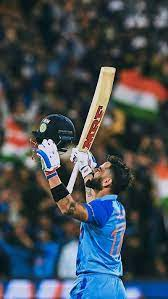

In [ ]:
from google.colab import files
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, concatenate
from IPython.display import Image, display

# Upload the image to Colab
uploaded = files.upload()

# Extract the file name from the uploaded files
new_image_path = list(uploaded.keys())[0]

# Check if the file exists
if not os.path.exists(new_image_path):
    print("Image file does not exist. Please upload the image.")
else:
    print(f"Image file "r"C:\Users\RAGHAVA REDDY\Downloads\download.jpeg" " exists.")

    # Load the InceptionV3 model pre-trained on ImageNet data
    base_model = InceptionV3(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

    # Placeholder dataset (replace this with your actual dataset)
    image_paths = [new_image_path]
    captions = ['King Kohli']

    # Preprocess captions
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)
    vocab_size = len(tokenizer.word_index) + 1

    # Create sequences of tokens from captions
    sequences = tokenizer.texts_to_sequences(captions)

    # Pad sequences to ensure uniform length
    max_len = max(len(seq) for seq in sequences)
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

    # Generate image features for each image
    image_features = []
    for path in image_paths:
        img = image.load_img(path, target_size=(299, 299))
        img_array = image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
        img_features = model.predict(img_array)
        image_features.append(img_features.flatten())

    image_features = tf.convert_to_tensor(image_features)

    # Image feature input
    image_input = Input(shape=(2048,), name='image_input')

    # Text sequence input
    caption_input = Input(shape=(max_len,), name='caption_input')

    # Embedding layer
    embedding_layer = Embedding(vocab_size, 256, input_length=max_len)(caption_input)

    # LSTM layer
    lstm_layer, _, _ = LSTM(512, return_sequences=True, return_state=True)(embedding_layer)

    # Reduce the sequence length to a single vector (using the last output in the sequence)
    lstm_output = lstm_layer[:, -1, :]

    # Concatenate image features and LSTM output
    concatenated = concatenate([image_input, lstm_output])

    # Fully connected layer
    fc_layer = Dense(512, activation='relu')(concatenated)

    # Output layer
    output_layer = Dense(vocab_size, activation='softmax')(fc_layer)

    # Create the model
    model = Model(inputs=[image_input, caption_input], outputs=output_layer)

    # Compile the model (make sure you have the correct loss function and metrics for your task)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Print a message indicating that the caption generation part is commented out
    print("King Kholi")

    # Display the uploaded image
    display(Image(filename=new_image_path))
